In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

In [69]:
data_dir = './dataset/step1'
IMG_SIZE = 224 
BATCH_SIZE = 32
EPOCHS = 15  
print(os.getcwd())

c:\Users\hyun4\Documents\Develop\shimter-ai


In [70]:
print(data_dir)
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)  

./dataset/step1
Found 140 files belonging to 2 classes.
Using 112 files for training.


In [71]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 140 files belonging to 2 classes.
Using 28 files for validation.


In [72]:
class_names = train_dataset.class_names
print("Names of class:", class_names)
num_classes = len(class_names)

Names of class: ['abnormal', 'normal']


In [73]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [74]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
])

In [75]:
base_model = tf.keras.applications.EfficientNetB0(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights=None
)

In [76]:
base_model.trainable = True


In [77]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = data_augmentation(inputs)
x = tf.keras.layers.Rescaling(1./255)(x)
x = base_model(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.2)(x)

outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

In [78]:
model = tf.keras.Model(inputs, outputs)

In [79]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [80]:
print("model:")
model.summary()

model:


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_19 (Rescaling)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,052,133 (15.46 MB)

 Trainable params: 4,010,110 (15.30 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [81]:
print("Start to learn")
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=EPOCHS
)
print("Finish")


Start to learn
Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 4s/step - accuracy: 0.6429 - loss: 0.6294 - val_accuracy: 0.6429 - val_loss: 0.6857
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9375 - loss: 0.2962 - val_accuracy: 0.6429 - val_loss: 0.6705
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.9464 - loss: 0.1946 - val_accuracy: 0.6429 - val_loss: 0.6578
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9196 - loss: 0.2103 - val_accuracy: 0.6429 - val_loss: 0.6520
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.9375 - loss: 0.1817 - val_accuracy: 0.6429 - val_loss: 0.6538
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9196 - loss: 0.2131 - val_accuracy: 0.6429 - val_loss: 0.6617
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9464 - loss: 0.1983 - val_accuracy: 0.6429 - val_loss: 0.6739
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.9464 - loss: 0.1652 - val_accuracy: 0.6429 - val_loss: 

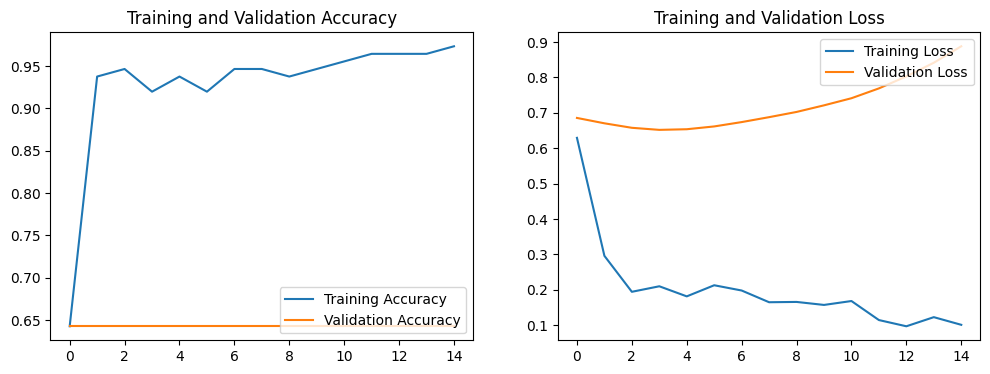

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [86]:
import glob

image_paths = glob.glob(os.path.join('./dataset/step3/*.jpg'))

for test_image_path in image_paths:
    img = tf.keras.utils.load_img(
        test_image_path, target_size=(IMG_SIZE, IMG_SIZE)
    )
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])

    file_name = os.path.basename(test_image_path)
    predicted_class = class_names[np.argmax(score)]
    confidence = 100 * np.max(score)

    print(f"File: {file_name} -> Class Prediction: '{predicted_class}' ({confidence:.2f}%)")
    
print('Finish to test')


File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.47e95a8ac68cce2c7f7aae9c12da4d06.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.da64ef7f3d638847b3ed787e5febd2f2.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 1000_F_217132285_OhaJpnPCjdp4zhlJaA42Izgt87JeJ2YX_jpg.rf.f3ce84546e65b19224ab87b5f5a22687.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 101_jpg.rf.12d4987b2c587186ca833c65c11bddd1.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 101_jpg.rf.3972ed5b8e79b8002e1b3bf7ede544ab.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 101_jpg.rf.c90ac9c5f08a6e523905a0e4d97c39e7.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 104_jpg.rf.3237550104c4a1b1c10d690879a1c3d5.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 104_jpg.rf.37520d7d603fd036f502f55b233fd8d1.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 104_jpg.rf.49f4f467c991ea1407cb1feaecc2d65e.jpg -> Class Prediction: 'abnormal' (68.97%)
File: 1

KeyboardInterrupt: 